Data Analytics and pre processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import os

base_path = os.path.join(os.getcwd(), 'Data')
fraud_data = pd.read_csv(os.path.join(base_path, 'Fraud_Data.csv'))
ip_country = pd.read_csv(os.path.join(base_path, 'IpAddress_to_Country.csv'))
credit_data = pd.read_csv(os.path.join(base_path, 'creditcard.csv'))


In [2]:
# Display basic information for Fraud_Data
print("Fraud_Data Info:")
display(fraud_data.info())
print(fraud_data.head(), "\n")

# Display basic information for IpAddress_to_Country
print("IpAddress_to_Country Info:")
display(ip_country.info())
print(ip_country.head(), "\n")

# Display basic information for creditcard.csv
print("Credit Card Data Info:")
display(credit_data.info())
print(credit_data.head(), "\n")


Fraud_Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


None

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0   

IpAddress_to_Country Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count 

None

   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China 

Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11 

None

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Display the first 5 rows for each dataset
print("First 5 rows of Fraud_Data:")
display(fraud_data.head())

print("\nFirst 5 rows of IpAddress_to_Country:")
display(ip_country.head())

print("\nFirst 5 rows of Credit Card Data:")
display(credit_data.head())


First 5 rows of Fraud_Data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



First 5 rows of IpAddress_to_Country:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



First 5 rows of Credit Card Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display all column names for each dataset
print("Columns in Fraud_Data:")
print(fraud_data.columns.tolist(), "\n")

print("Columns in IpAddress_to_Country:")
print(ip_country.columns.tolist(), "\n")

print("Columns in Credit Card Data:")
print(credit_data.columns.tolist(), "\n")


Columns in Fraud_Data:
['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'] 

Columns in IpAddress_to_Country:
['lower_bound_ip_address', 'upper_bound_ip_address', 'country'] 

Columns in Credit Card Data:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'] 



Data Cleaning

In [10]:
# Data Cleaning for Credit Card Data
def clean_credit_data(df):
    # Handle missing 'Time'
    if 'Time' in df.columns:
        df = df.dropna(subset=['Time'])
        print("Dropped rows with missing 'Time' values.")

    # Handle anonymized features
    anonymized_features = [f'V{i}' for i in range(1, 29)]
    available_features = [col for col in anonymized_features if col in df.columns]

    if available_features:
        missing_count = df[available_features].isna().sum().sum()
        if missing_count > 0:
            knn_imputer = KNNImputer(n_neighbors=5)
            df[available_features] = knn_imputer.fit_transform(df[available_features])
            print(f"Applied KNN imputation for anonymized features with {missing_count} missing values.")

    # Handle missing 'Amount'
    if 'Amount' in df.columns:
        df['Amount'] = df['Amount'].fillna(df['Amount'].median())
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
        print("Filled missing 'Amount' values with median and ensured numeric type.")

    # Handle missing 'Class'
    if 'Class' in df.columns:
        df = df.dropna(subset=['Class'])
        print("Dropped rows with missing 'Class'.")

    # Remove Duplicates
    df = df.drop_duplicates()
    print("Removed duplicate rows from Credit Card Data.")

    return df

# Apply cleaning
credit_data = clean_credit_data(credit_data)


Dropped rows with missing 'Time' values.
Filled missing 'Amount' values with median and ensured numeric type.
Dropped rows with missing 'Class'.
Removed duplicate rows from Credit Card Data.


In [9]:
# Data Cleaning for Fraud Data
def clean_fraud_data(df):
    # Handle missing 'signup_time' and 'purchase_time'
    time_cols = ['signup_time', 'purchase_time']
    if all(col in df.columns for col in time_cols):
        df = df.dropna(subset=time_cols)
        df[time_cols] = df[time_cols].apply(pd.to_datetime, errors='coerce')
        print("Handled missing time columns and converted to datetime.")
    else:
        print("Missing time columns in Fraud Data.")

    # Handle 'purchase_value'
    if 'purchase_value' in df.columns:
        df['purchase_value'] = df['purchase_value'].fillna(df['purchase_value'].median())
        print("Filled missing 'purchase_value' with median.")
    else:
        print("'purchase_value' column is missing.")

    # Handle 'age'
    if 'age' in df.columns:
        df['age'] = df['age'].fillna(df['age'].median())
        df['age'] = pd.to_numeric(df['age'], errors='coerce')
        print("Handled missing 'age' and ensured numeric type.")
    else:
        print("'age' column is missing.")

    # Handle categorical columns with mode
    categorical_columns = ['source', 'browser', 'sex']
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
            df[col] = df[col].astype('category')
            print(f"Filled missing '{col}' with mode and converted to category.")
        else:
            print(f"'{col}' column is missing.")

    # Handle missing 'user_id' and 'class'
    essential_cols = ['user_id', 'class']
    if all(col in df.columns for col in essential_cols):
        df = df.dropna(subset=essential_cols)
        print("Dropped rows with missing 'user_id' or 'class'.")
    else:
        print("Missing essential columns ('user_id' or 'class').")

    # Remove Duplicates
    df = df.drop_duplicates()
    print("Removed duplicate rows from Fraud Data.")

    return df

# Apply cleaning
fraud_data = clean_fraud_data(fraud_data)


Handled missing time columns and converted to datetime.
Filled missing 'purchase_value' with median.
Handled missing 'age' and ensured numeric type.
Filled missing 'source' with mode and converted to category.
Filled missing 'browser' with mode and converted to category.
Filled missing 'sex' with mode and converted to category.
Dropped rows with missing 'user_id' or 'class'.
Removed duplicate rows from Fraud Data.


In [8]:
# Data Cleaning for IP Country Data
def clean_ip_country(df):
    # Handle missing IP address bounds
    ip_cols = ['lower_bound_ip_address', 'upper_bound_ip_address']
    if all(col in df.columns for col in ip_cols):
        df.dropna(subset=ip_cols, inplace=True)
        print("Dropped rows with missing IP address range values.")
    else:
        print("IP address range columns are missing.")

    # Handle missing 'country'
    if 'country' in df.columns:
        if df['country'].isna().sum() > 0:
            df['country'].fillna('unknown', inplace=True)
            print("Filled missing 'country' with 'unknown'.")
        else:
            print("'country' column has no missing values.")
    else:
        print("'country' column is missing.")

    # Remove Duplicates
    df.drop_duplicates(inplace=True)
    print("Removed duplicate rows.")

# Apply cleaning
clean_ip_country(ip_country)


Dropped rows with missing IP address range values.
'country' column has no missing values.
Removed duplicate rows.


EDA Analysis

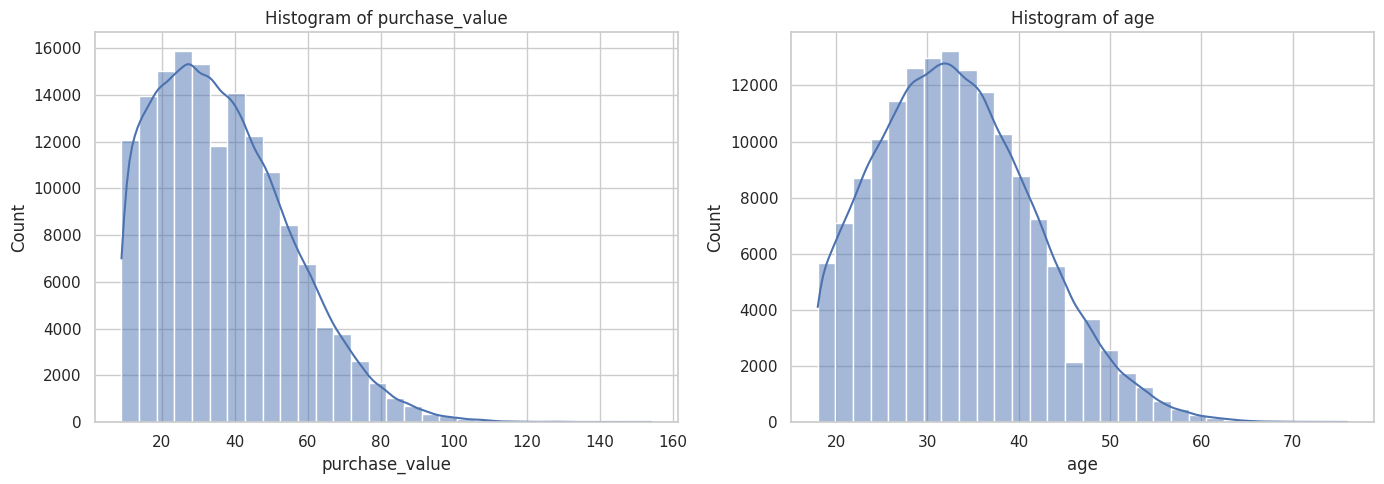

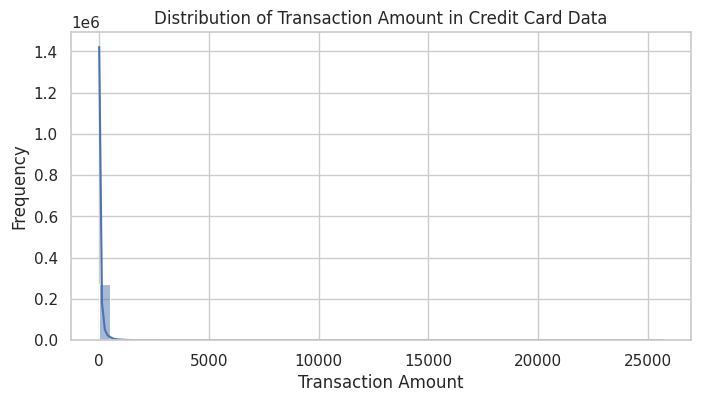

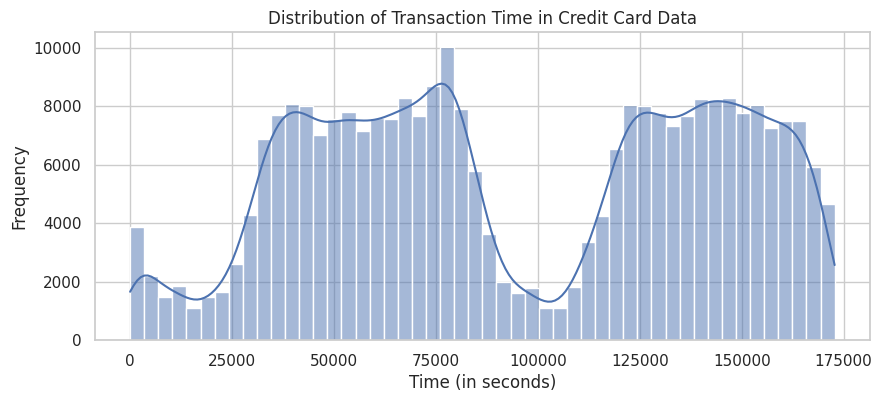

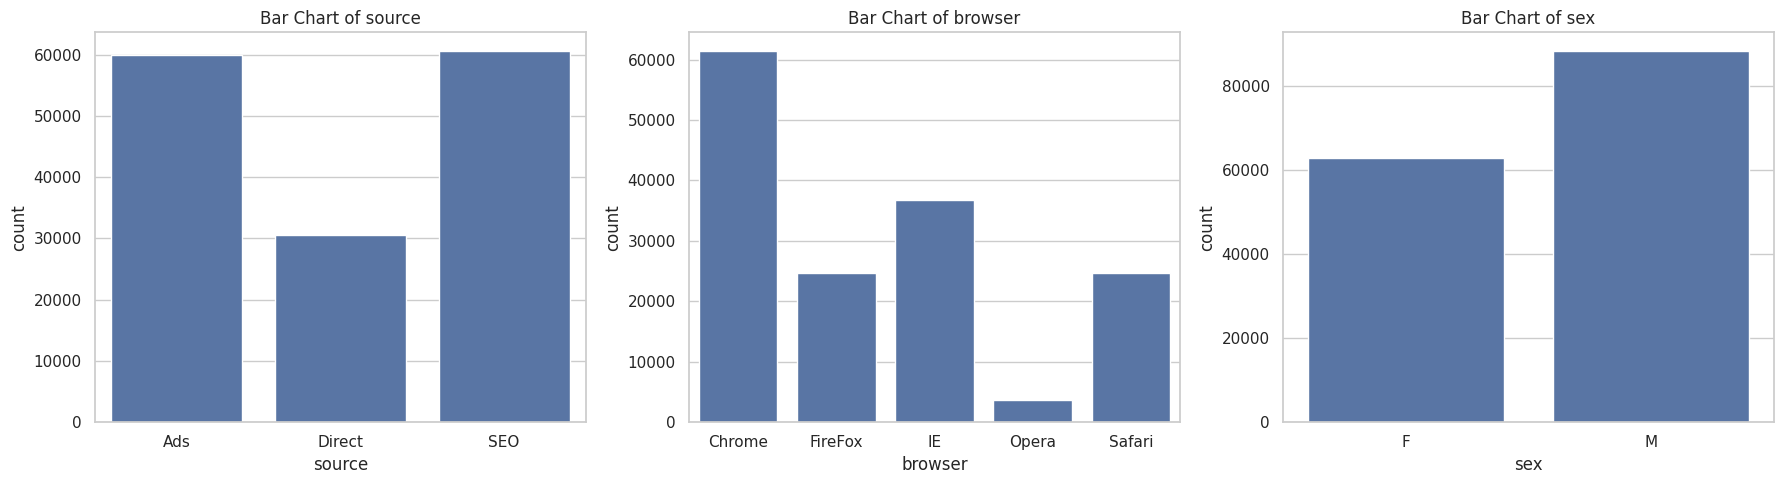

In [11]:
# Set plot style for consistency
sns.set(style="whitegrid")

# Univariate Analysis - Fraud Data (purchase_value & age)
numerical_features = ['purchase_value', 'age']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
for i, feature in enumerate(numerical_features):
    if feature in fraud_data.columns:
        sns.histplot(fraud_data[feature], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Transaction Amount Distribution - Credit Card Data
if 'Amount' in credit_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_data['Amount'], bins=50, kde=True)
    plt.title('Distribution of Transaction Amount in Credit Card Data')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.show()

# Time Feature Analysis - Credit Card Data
if 'Time' in credit_data.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(credit_data['Time'], bins=50, kde=True)
    plt.title('Distribution of Transaction Time in Credit Card Data')
    plt.xlabel('Time (in seconds)')
    plt.ylabel('Frequency')
    plt.show()

# Categorical Features - Fraud Data
categorical_features = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    if feature in fraud_data.columns:
        sns.countplot(x=feature, data=fraud_data, ax=axes[i])
        axes[i].set_title(f'Bar Chart of {feature}')
plt.tight_layout()
plt.show()


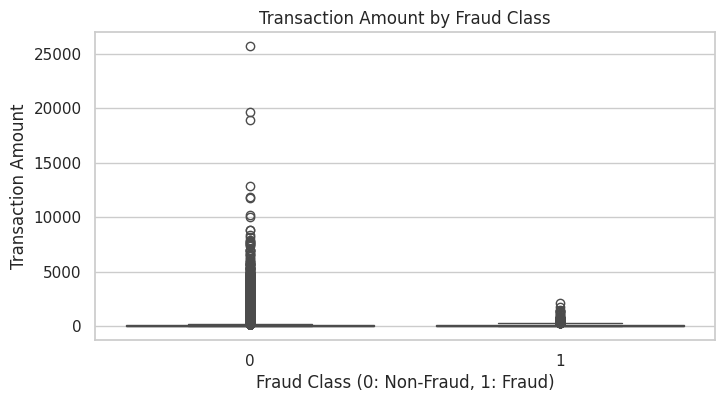

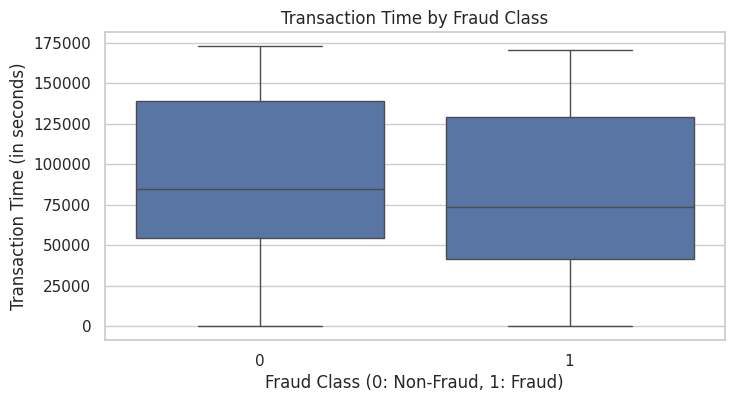

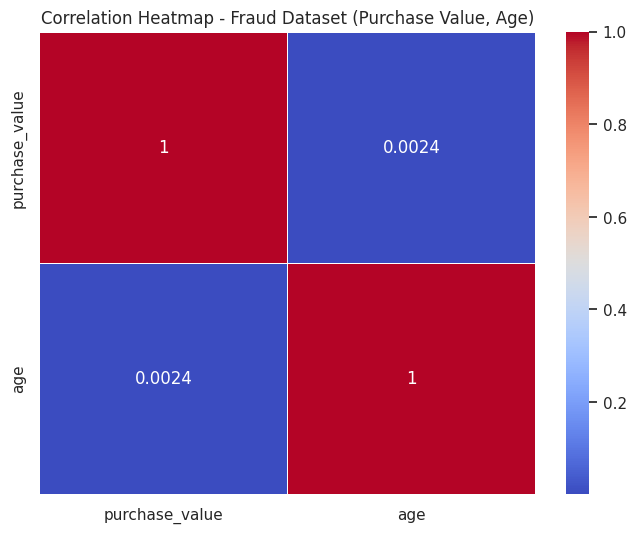

In [12]:
# Bivariate Analysis - Credit Card Data
# Transaction Amount vs Fraud Class
if {'Class', 'Amount'}.issubset(credit_data.columns):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y='Amount', data=credit_data)
    plt.title('Transaction Amount by Fraud Class')
    plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel('Transaction Amount')
    plt.show()

# Time vs Fraud Class
if {'Class', 'Time'}.issubset(credit_data.columns):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y='Time', data=credit_data)
    plt.title('Transaction Time by Fraud Class')
    plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel('Transaction Time (in seconds)')
    plt.show()

# Fraud Dataset Correlation Heatmap
fraud_numerical_features = ['purchase_value', 'age']
if set(fraud_numerical_features).issubset(fraud_data.columns):
    plt.figure(figsize=(8, 6))
    sns.heatmap(fraud_data[fraud_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap - Fraud Dataset (Purchase Value, Age)')
    plt.show()


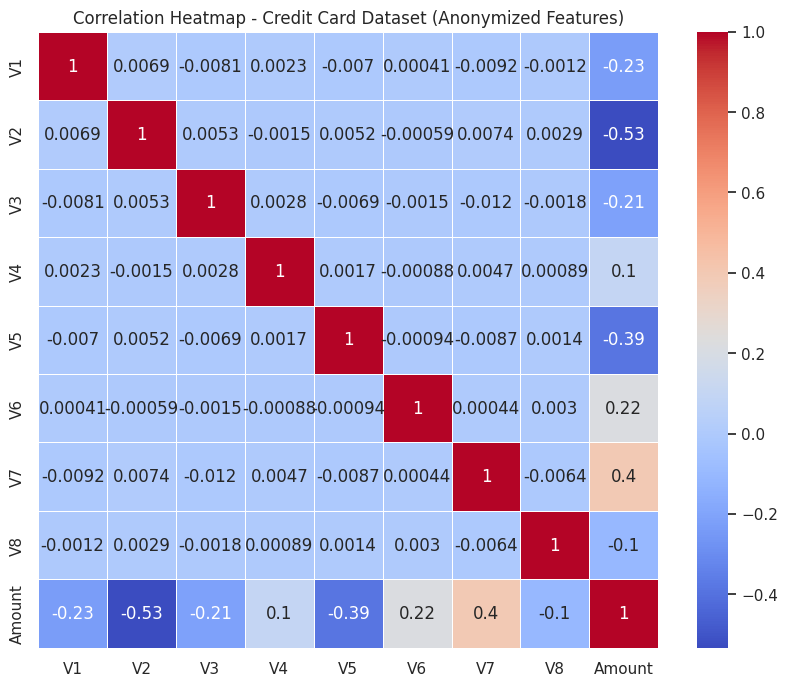

In [13]:
# Credit Card Dataset Correlation Heatmap
# Sample Anonymized features in the credit card dataset
creditcard_numerical_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Amount']

# Check if the features exist in the credit card data before plotting
if set(creditcard_numerical_features).issubset(credit_data.columns):
    plt.figure(figsize=(10, 8))
    sns.heatmap(credit_data[creditcard_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap - Credit Card Dataset (Anonymized Features)')
    plt.show()


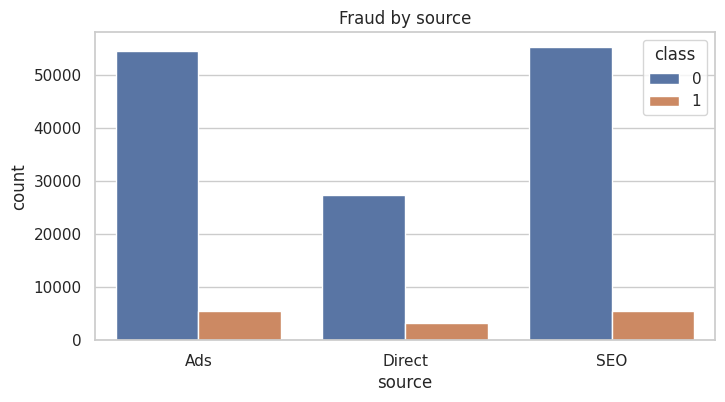

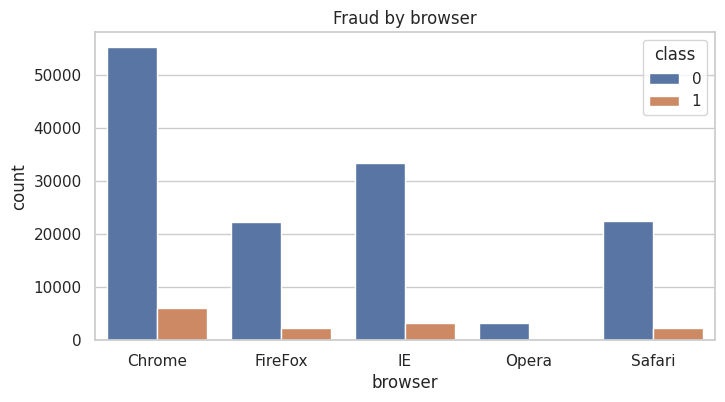

In [17]:
# Bar plots or count plots to analyze fraud (class) by categorical features
categorical_features_for_fraud = ['source', 'browser']

for feature in categorical_features_for_fraud:
    if feature in fraud_data.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, hue='class', data=fraud_data)  # 'class' is the correct column name
        plt.title(f'Fraud by {feature}')
        plt.show()


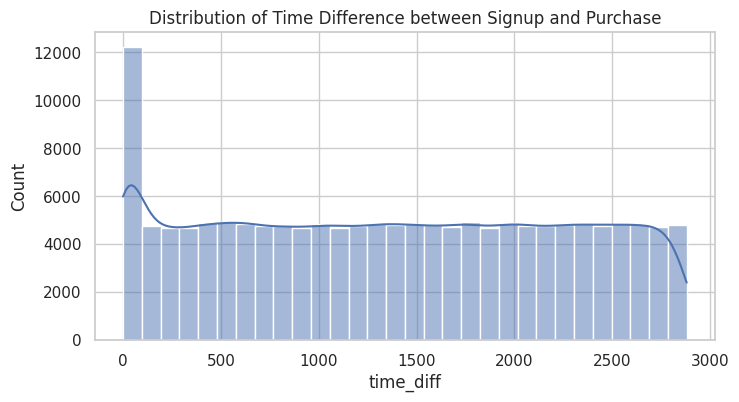

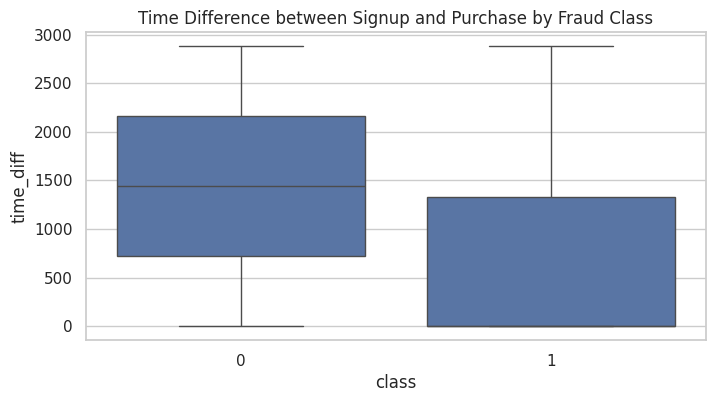

In [19]:
# 6. Plot time difference between signup_time and purchase_time
if 'signup_time' in fraud_data.columns and 'purchase_time' in fraud_data.columns:
    # Convert to datetime if not already done
    fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
    fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

    # Create a new feature for the time difference
    fraud_data['time_diff'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600.0  # In hours

    # Plot the time difference
    plt.figure(figsize=(8, 4))
    sns.histplot(fraud_data['time_diff'], kde=True, bins=30)
    plt.title('Distribution of Time Difference between Signup and Purchase')
    plt.show()

    # Analyze time difference by fraud class
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y='time_diff', data=fraud_data)
    plt.title('Time Difference between Signup and Purchase by Fraud Class')
    plt.show()


Data Merging

In [25]:
# Sort both DataFrames by ip_address and lower_bound_ip_address for asof merge
fraud_data_sorted = fraud_data.sort_values(by='ip_address')
ip_data_sorted = ip_country.sort_values(by='lower_bound_ip_address')

# Perform an asof merge on ip_address to find the closest lower_bound_ip_address
merged_data = pd.merge_asof(
    fraud_data_sorted, 
    ip_data_sorted, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address',
    direction='backward'  # Ensures that we match the closest lower bound less than or equal to ip_address
)

# Now filter rows where the ip_address falls within the lower and upper bounds
merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) &
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]

display(merged_data)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,1008.948611,1.677824e+07,1.677926e+07,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,342.121389,1.680998e+07,1.684275e+07,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,554.870556,1.684326e+07,1.684378e+07,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,2122.471389,1.692467e+07,1.694106e+07,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,2847.105278,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131724,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3.757992e+09,0,721.591944,3.757965e+09,3.758031e+09,China
131725,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3.758008e+09,0,491.806667,3.757965e+09,3.758031e+09,China
131726,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3.758019e+09,0,920.988056,3.757965e+09,3.758031e+09,China
131727,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3.758029e+09,0,109.936389,3.757965e+09,3.758031e+09,China


Feature Engineering, Normalization and Scaling, 

In [28]:
#Fruad data
# 5.1 Transaction Frequency (Count of transactions per user)
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# 5.2 Time-based features: Hour of the day and Day of the week for purchase_time
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

# creditcard
# 5.3 Time-based features: Convert 'Time' into days
credit_data['time_in_days'] = credit_data['Time'] / (60*60*24)  # Convert seconds to days


In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Fraud_Data.csv - Scale 'purchase_value'
scaler = StandardScaler()
merged_data['purchase_value_scaled'] = scaler.fit_transform(merged_data[['purchase_value']])

# creditcard.csv - Scale 'Amount'
credit_data['Amount_scaled'] = scaler.fit_transform(credit_data[['Amount']])

In [30]:
categorical_features = ['source', 'browser', 'country']
merged_data= pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)

le = LabelEncoder()
merged_data['sex'] = le.fit_transform(merged_data['sex'])

# No categorical features to encode in IpAddress_to_Country or creditcard datasets.
display(merged_data.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,time_diff,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,0,30,1.677886e+07,0,1008.948611,...,False,False,False,False,False,False,False,False,False,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,0,34,1.684205e+07,0,342.121389,...,False,False,False,False,False,False,False,False,False,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,1,29,1.684366e+07,0,554.870556,...,False,False,False,False,False,False,False,False,False,False
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,0,30,1.693873e+07,0,2122.471389,...,False,False,False,False,False,False,False,False,False,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,0,37,1.697198e+07,0,2847.105278,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Summary of Dataset Shapes
print(f"merged_data shape: {merged_data.shape}")
print(f"Fraud_Data shape: {fraud_data.shape}")
print(f"IpAddress_to_Country shape: {ip_country.shape}")
print(f"Creditcard shape: {credit_data.shape}")

merged_data shape: (129146, 202)
Fraud_Data shape: (151112, 12)
IpAddress_to_Country shape: (138846, 3)
Creditcard shape: (283726, 33)


In [32]:
# Save the preprocessed Fraud_Data
fraud_data.to_csv('Preprocessed_Fraud_Data.csv', index=False)

# Save the merged data
merged_data.to_csv('merged_data.csv', index=False)

# Save the preprocessed IpAddress_to_Country data
ip_country.to_csv('Preprocessed_IpAddress_to_Country.csv', index=False)

# Save the preprocessed Credit Card data
credit_data.to_csv('Preprocessed_Creditcard_Data.csv', index=False)
